# 데이터 불러오기

In [19]:
import pandas as pd

with open('./data/sample.csv') as f:
    table = pd.read_csv(f) 
df_sample = pd.DataFrame(table)
df_sample = df_sample.fillna(0)
df_sample = df_sample.drop(['Unnamed: 0'], axis=1)
print(df_sample.info(1))
print(df_sample)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mid3    1288 non-null   float64
 1   ele     1288 non-null   float64
 2   high1   1288 non-null   float64
 3   mid1    1288 non-null   float64
 4   mid2    1288 non-null   float64
 5   high2   1288 non-null   float64
 6   high3   1288 non-null   float64
dtypes: float64(7)
memory usage: 70.6 KB
None
          mid3       ele     high1      mid1      mid2     high2     high3
0     0.036036  0.423423  0.027027  0.396396  0.081081  0.027027  0.009009
1     0.036364  0.424242  0.018182  0.339394  0.157576  0.012121  0.012121
2     0.028986  0.471014  0.065217  0.275362  0.137681  0.007246  0.014493
3     0.015267  0.465649  0.038168  0.328244  0.129771  0.015267  0.007634
4     0.039062  0.437500  0.046875  0.335938  0.101562  0.031250  0.007812
...        ...       ...       ...       ...       ...       ... 

In [20]:
#texts 
with open('./data/mouitest_list.csv', encoding='utf-8') as f:
    table = pd.read_csv(f, header=0)
df_contents_1 = pd.DataFrame(table)
# print(df_contents_1.info(1))

df_contents_1 = df_contents_1.drop(['Unnamed: 4'], axis=1)
df_contents_1 = df_contents_1.dropna(axis=0)
# print(df_contents_1.info(1))
df_contents_1['video_id'] = df_contents_1['video_id'].astype('object')
df_contents_1['order'] = df_contents_1['order'].astype('object')
print('df_contents_1의 info : ', df_contents_1.info(1))



with open('./data/textbook_list.csv', encoding='utf-8') as f:
    table = pd.read_csv(f, header=0)
df_contents_2 = pd.DataFrame(table)
# print(df_contents_2.info(1))
df_contents_2 = df_contents_2.drop(['Unnamed: 4'], axis=1)
df_contents_2 = df_contents_2.dropna(axis=0)
print('df_contents_2의 info : ', df_contents_2.info(1))



df_contents = df_contents_1.groupby(['video_id','title'])['sentence'].apply(' '.join).reset_index()
print(df_contents['sentence'][0])
print('df_contents : ',df_contents)

df_contents_2['video_id'] = df_contents_2['video_id'].astype('object')
df_contents_2['order'] = df_contents_2['order'].astype('object')
print(df_contents_2.info(1))
df_contents_txt = df_contents_2.groupby(['video_id','title'])['sentence'].apply(' '.join).reset_index()
print(df_contents_txt['sentence'][0])
print('df_contents_ txt : ',df_contents_txt)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 1846
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1839 non-null   object
 1   order     1839 non-null   object
 2   video_id  1839 non-null   object
 3   title     1839 non-null   object
dtypes: object(4)
memory usage: 71.8+ KB
df_contents_1의 info :  None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32874 entries, 0 to 32956
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  32874 non-null  object
 1   order     32874 non-null  int64 
 2   video_id  32874 non-null  int64 
 3   title     32874 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.3+ MB
df_contents_2의 info :  None
Dear Mr. Spencer, I will have lived in this apartment for ten years as of this coming April. I have enjoyed living here and hope to continue doing so. When I first moved into the Gree

In [21]:
df_contents_txt['level'] = ['H3' if '수능특강' in x 
                            else 'H3' if '고3' in x
                            else 'H3' if '수능' in x
                            else 'H2' if '고2' in x 
                            else 'H1' if '고1' in x
                            else 'M3' if '중등3' in x
                            else 'M2' if 'NE능률(김)' in x
                            else 'M2' if '중등2' in x
                            else 'M1' if '중등1' in x
                            else 'H1' if '고등' in x
                            else 'H1' if 'YBM(박)' in x
                            else 'M1' if '중등' in x
                            else 'non-labeled' for x in df_contents_txt['title']]

from collections import Counter
print(Counter(df_contents_txt['level']))
# print(df_contents_txt.loc[df_contents_txt['level']=='non-labeled'])
print(df_contents_txt.info(1))

Counter({'H3': 488, 'H1': 256, 'H2': 200, 'M2': 141, 'M3': 103, 'M1': 100})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  1288 non-null   int64 
 1   title     1288 non-null   object
 2   sentence  1288 non-null   object
 3   level     1288 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.4+ KB
None


In [22]:
df = df_contents_txt.merge(df_sample, left_index=True, right_index=True)
print(df.info(0))
display(df.head(2))
# df.to_csv('./1288_contents_total.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   video_id  1288 non-null   int64  
 1   title     1288 non-null   object 
 2   sentence  1288 non-null   object 
 3   level     1288 non-null   object 
 4   mid3      1288 non-null   float64
 5   ele       1288 non-null   float64
 6   high1     1288 non-null   float64
 7   mid1      1288 non-null   float64
 8   mid2      1288 non-null   float64
 9   high2     1288 non-null   float64
 10  high3     1288 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 110.8+ KB
None


,video_id,title,sentence,level,mid3,ele,high1,mid1,mid2,high2,high3
0,26657,수능특강 1 - Gateway,"Dear Mr.Kayne, I am a resident of Cansinghill ...",H3,0.036036,0.423423,0.027027,0.396396,0.081081,0.027027,0.009009
1,26658,수능특강 1 - 1,Can’t leave the office or home to volunteer? N...,H3,0.036364,0.424242,0.018182,0.339394,0.157576,0.012121,0.012121


In [23]:
import tensorflow as tf
import numpy as np
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score

import graphviz
from IPython.display import Image  

%matplotlib inline
import matplotlib.pyplot as plt
# import pydotplus 


['mid3', 'ele', 'high1', 'mid1', 'mid2', 'high2', 'high3']
[0.20215847 0.         0.30370287 0.         0.33808872 0.
 0.15604994]
[0.6407767  0.5631068  0.58252427 0.6407767  0.63106796 0.66019417
 0.58252427 0.61165049 0.63106796 0.60194175]
Accuracy Score: 0.5658914728682171


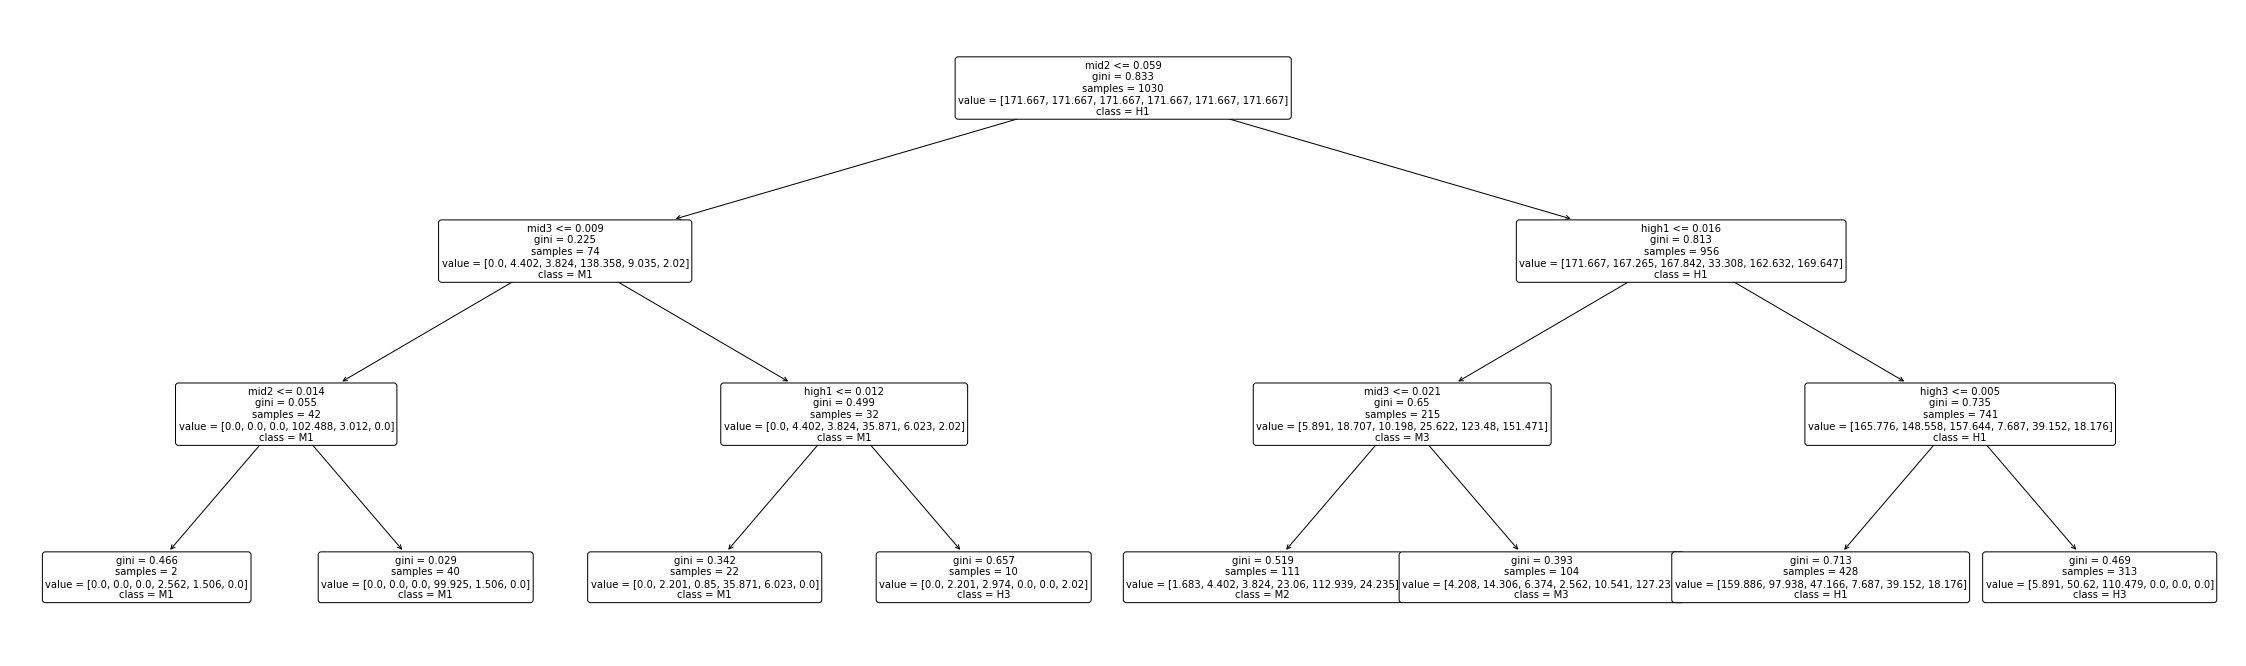

In [24]:
from collections import Counter

with tf.Graph().as_default():
    X = df.values[:,4:]
    Y = df.values[:,3]

    class_names = ['H1','H2','H3','M1', 'M2', 'M3'] #alphabet 오름차순 

    col = []
    for names in df.head():
        col.append(names)
    cols=col[4:]
    print(cols)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    model = DecisionTreeClassifier(max_depth=3, random_state=123, class_weight = 'balanced') #, class_weight = weight
    model = model.fit(X_train, y_train)
    print(model.feature_importances_)
    print(cross_val_score(model, X_train, y_train, cv=10))
    
    y_pred = model.predict(X_test) #Accuracy
    from sklearn import metrics
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

    plt.figure(figsize=(40,12))
    tree.plot_tree(model, fontsize=10,
                   class_names=class_names,
                   feature_names=cols,
                   impurity=True, filled=False,
                   rounded=True)
#     plt.savefig('./tree.png', bbox_inches='tight')


[0.20215847 0.         0.30370287 0.         0.33808872 0.
 0.15604994]


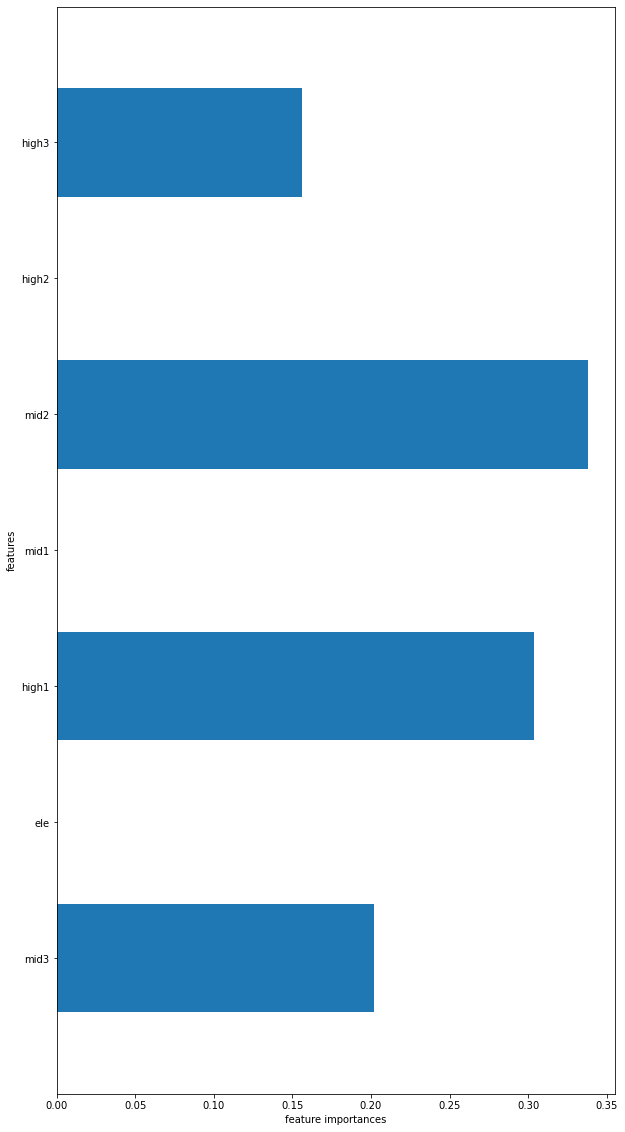

In [25]:
#feature importance 

f = model.feature_importances_
print(f)

def plot_feature_importances(model):
    plt.figure(figsize=(10,20))
    n_features = X.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
#     plt.savefig('./imp.png', bbox_inches='tight')

plot_feature_importances(model)